<a href="https://colab.research.google.com/github/Rupkatha-dev/Task1-IIT-G-/blob/main/MNIST_MLP%26CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Classification using Multi-Layer Perceptron(MLP) & Convulutional Neural network(CNN) in PyTorch

## Import Libraries

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

Number of training samples: 60000
Image shape (Height x Width): (28, 28)
Label of first image: 5


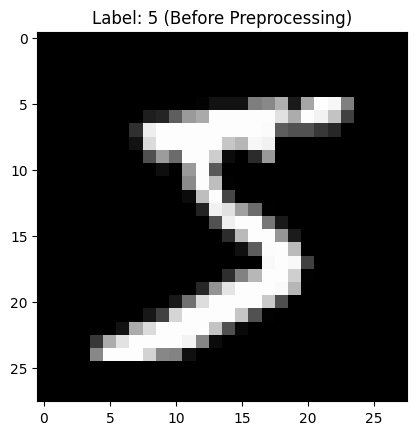

In [ ]:
# Downloading raw dataset without normalization
raw_train = datasets.MNIST(root="./data", train=True, download=True)

print("Number of training samples:", len(raw_train))
print("Image shape (Height x Width):", raw_train[0][0].size)
print("Label of first image:", raw_train[0][1])

# Display one raw image
plt.imshow(raw_train[0][0], cmap="gray")
plt.title(f"Label: {raw_train[0][1]} (Before Preprocessing)")
plt.show()


Load and Preprocess MNIST Dataset

Images are 28x28 grayscale.

Normalize pixel values to [-1, 1].

In [ ]:
# Transform: Convert to Tensor + Normalize
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load train & test datasets
train_dataset = datasets.MNIST(root="./data", train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root="./data", train=False, transform=transform, download=True)

# DataLoader for batching
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)


Training the Model

In [ ]:
def train_model(model, train_loader, criterion, optimizer, epochs=5):
  for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_loader):.4f}")


Evaluate the Model on Test Data

In [ ]:
def evaluate_model(model, test_loader):
  model.eval()
  correct = 0
  total = 0

  with torch.no_grad():
      for data, target in test_loader:
          output = model(data)
          _, predicted = torch.max(output, 1)
          total += target.size(0)
          correct += (predicted == target).sum().item()

  accuracy = 100 * correct / total
  print(f"Test Accuracy: {accuracy:.2f}%")
  return accuracy


Define MLP Model

Input: 784 (28×28)

Hidden Layers: 128 → 64

Output: 10 classes (digits 0–9)

In [ ]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)  # first hidden layer
        self.fc2 = nn.Linear(128, 64)     # second hidden layer
        self.fc3 = nn.Linear(64, 10)      # output layer

    def forward(self, x):
        x = x.view(-1, 28*28)     # flatten the image
        x = F.relu(self.fc1(x))   # first hidden layer with ReLU
        x = F.relu(self.fc2(x))   # second hidden layer with ReLU
        x = self.fc3(x)           # output layer
        return x

mlp_model = MLP()

Define Loss Function and Optimize

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(mlp_model.parameters(), lr=0.001)

In [ ]:
print("\n--- Training MLP ---")
train_model(mlp_model, train_loader, criterion, optimizer, epochs=5)
print("--- Evaluating MLP ---")
evaluate_model(mlp_model, test_loader)


--- Training MLP ---
Epoch 1/5, Loss: 0.3741
Epoch 2/5, Loss: 0.1767
Epoch 3/5, Loss: 0.1300
Epoch 4/5, Loss: 0.1046
Epoch 5/5, Loss: 0.0890
--- Evaluating MLP ---
Test Accuracy: 96.97%


Predict a Single Image

In [ ]:
def predict_and_show(model, dataset, index=0):
# Take one test sample
  sample_img, sample_label = test_dataset[index]
  plt.imshow(sample_img.squeeze(), cmap="gray")
  plt.title(f"True Label: {sample_label}")
  plt.show()

  # Model prediction
  with torch.no_grad():
      output = model(sample_img.unsqueeze(0))
      _, pred = torch.max(output, 1)
      print(f"Predicted Label: {pred.item()}")


Prediction with MLP:


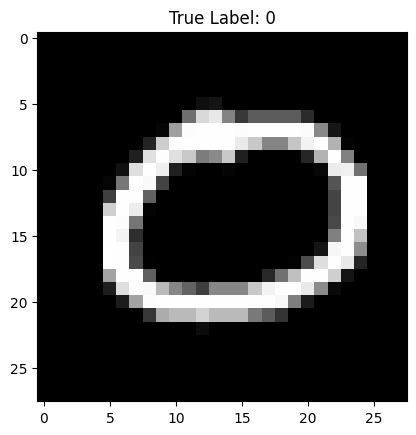

Predicted Label: 0


In [ ]:
# Prediction with MLP
print("Prediction with MLP:")
predict_and_show(mlp_model, test_dataset, index=69)

cnn

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)  # 28x28 → 32 maps
        self.pool1 = nn.MaxPool2d(2, 2)                          # 28x28 → 14x14
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1) # 14x14 → 64 maps
        self.pool2 = nn.MaxPool2d(2, 2)                          # 14x14 → 7x7
        self.fc1 = nn.Linear(64*7*7, 128)                        # fully connected
        self.fc2 = nn.Linear(128, 10)                            # output

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = x.view(-1, 64*7*7)  # flatten
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

cnn_model = CNN()


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_model.parameters(), lr=0.001)

In [ ]:
print("\n--- Training CNN ---")
train_model(cnn_model, train_loader, criterion, optimizer, epochs=5)
print("--- Evaluating CNN ---")
evaluate_model(cnn_model, test_loader)


--- Training CNN ---
Epoch 1/5, Loss: 0.1592
Epoch 2/5, Loss: 0.0451
Epoch 3/5, Loss: 0.0310
Epoch 4/5, Loss: 0.0232
Epoch 5/5, Loss: 0.0173
--- Evaluating CNN ---
Test Accuracy: 99.03%


Prediction with MLP:


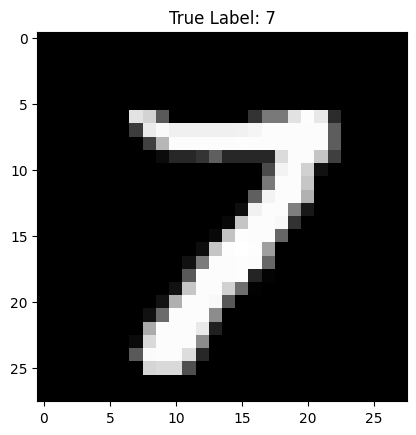

Predicted Label: 7


In [ ]:
# Prediction with MLP
print("Prediction with MLP:")
predict_and_show(cnn_model, test_dataset, index=34)

Test Accuracy: 96.97%
Test Accuracy: 99.03%


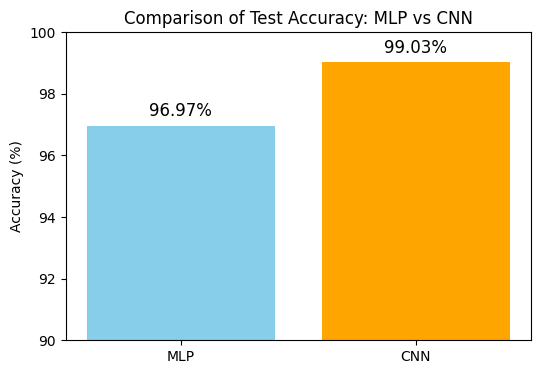

In [96]:
import matplotlib.pyplot as plt

# Example: store results after evaluation
mlp_acc = evaluate_model(mlp_model, test_loader)   # returns accuracy %
cnn_acc = evaluate_model(cnn_model, test_loader)   # returns accuracy %

# Create comparison chart
models = ["MLP", "CNN"]
accuracies = [mlp_acc, cnn_acc]

plt.figure(figsize=(6,4))
plt.bar(models, accuracies, color=["skyblue", "orange"])
plt.ylim(90, 100)  # zoom in between 90–100%
plt.ylabel("Accuracy (%)")
plt.title("Comparison of Test Accuracy: MLP vs CNN")
for i, acc in enumerate(accuracies):
    plt.text(i, acc+0.3, f"{acc:.2f}%", ha="center", fontsize=12)
plt.show()
